## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?

They start the blend together with more noise.

3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)

The more noiser one has a worse scree plot.

4. Explain the intuition of the elbow, using this numerical simulation as an example.

The intuition here being that, if you ahve more variance or noise in the data set you need more local information, meaning more neighbors to accurately define a datapoint.

In [1]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

Text(0.5, 0, 'X1')

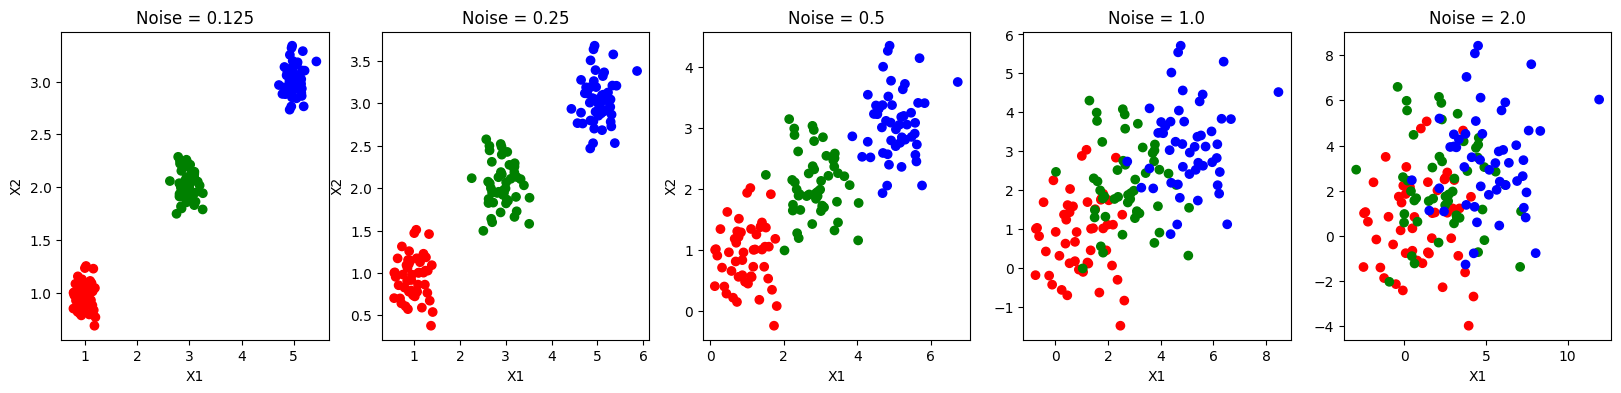

In [2]:
""" 
2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise`
goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
"""
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,5,figsize=(20,4))

ax[0].scatter(df0_125["x1"],df0_125["x2"],c=df0_125["group"].map({'a':'r','b':'g','c':'b'}))
ax[0].set_title("Noise = 0.125")
ax[0].set_xlabel("X1")
ax[0].set_ylabel("X2")

ax[1].scatter(df0_25["x1"],df0_25["x2"],c=df0_25["group"].map({'a':'r','b':'g','c':'b'}))
ax[1].set_title("Noise = 0.25")
ax[1].set_xlabel("X1")
ax[1].set_ylabel("X2")

ax[2].scatter(df0_5["x1"],df0_5["x2"],c=df0_5["group"].map({'a':'r','b':'g','c':'b'}))
ax[2].set_title("Noise = 0.5")
ax[2].set_xlabel("X1")
ax[2].set_ylabel("X2")

ax[3].scatter(df1_0["x1"],df1_0["x2"],c=df1_0["group"].map({'a':'r','b':'g','c':'b'}))
ax[3].set_title("Noise = 1.0")
ax[3].set_xlabel("X1")

ax[4].scatter(df2_0["x1"],df2_0["x2"],c=df2_0["group"].map({'a':'r','b':'g','c':'b'}))
ax[4].set_title("Noise = 2.0")
ax[4].set_xlabel("X1")





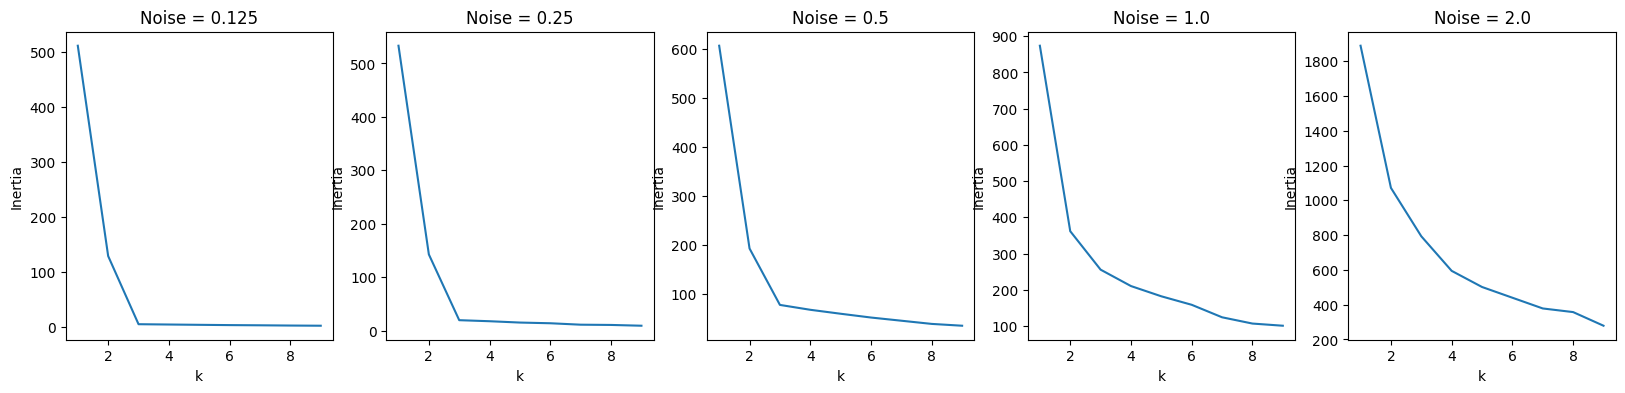

In [ ]:
""" 
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the 
scree plot (particularly the presence of a clear "elbow") and your ability to definitively 
select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
"""

fig,ax = plt.subplots(1,5,figsize=(20,4))

from sklearn.cluster import KMeans

for i,df in enumerate([df0_125,df0_25,df0_5,df1_0,df2_0]):
    inertia = []
    for k in range(1,10):
        km = KMeans(n_clusters=k, n_init="auto")
        km.fit(df[["x1","x2"]])
        inertia.append(km.inertia_)
    ax[i].plot(range(1,10),inertia)
    ax[i].set_title(f"Noise = {2**i/8}")
    ax[i].set_xlabel("k")
    ax[i].set_ylabel("Inertia")


**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they Raised, `Raised`, the total amount they Spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?

For Raised and Spent, I had to strip the $ and , and convert it to an int. This int can then be passed into the max-min normalize on those variables. I did the same for Cash on hand and Debts

2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.

Republican and Democratic politicians comrpise the smallest clusters, but only Democractic politicians were in the smallest cluster having raised and spent >$50M. I looked into some of the races, even though there was massive spending and fundraisiing the outcomes didn't really seem that "neck-to-neck".

3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.

Usually, people don't go into debt trying to run for a position. The clustering here essentially separated out the politicians that had a lot of debt here, but also cash on hand as well.

4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?

Running k-means on all of the 4 variables basically led to even fine-grained clusters, as it needed more informations in order to construct the clusters. This is why I ended up with 5 clusters insetead of the previous 3. Also, looking into the specific variables we see that the smaller clusters indeed use more information with them basically having some value in the 4 variables.

5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

I don't think it led to particularly interesting insights, but it did give a starting point to look into. i.e. why in Florida did Flemmings raise and spend so much to still lose, or if that does say something about the political moment. I woudl also have to understand the questions I want to ask a bit more, because just procedurally running a K-means algorithm doesn't really do much for you, if you don't have a question you are doing it for.

In [59]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("./data/2022 election cycle fundraising.csv")
df_lookup = df.copy()
df.isna().sum()

index           0
Member          0
Party           0
State           0
Chamber         0
Raised          0
Spent           0
Cash on Hand    0
Debts           0
dtype: int64

In [60]:
df.dtypes

index            int64
Member          object
Party           object
State           object
Chamber         object
Raised          object
Spent           object
Cash on Hand    object
Debts           object
dtype: object

In [61]:
df["Raised"] = df["Raised"].str.replace("$","").str.replace(",","").astype(int)
df["Spent"] = df["Spent"].str.replace("$","").str.replace(",","").astype(int)
df["Cash on Hand"] = df["Cash on Hand"].str.replace("$","").str.replace(",","").astype(int)
df["Debts"] = df["Debts"].str.replace("$","").str.replace(",","").astype(int)

C:\Users\commo\AppData\Local\Temp\ipykernel_17836\38739967.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Raised"] = df["Raised"].str.replace("$","").str.replace(",","").astype(int)
C:\Users\commo\AppData\Local\Temp\ipykernel_17836\38739967.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Spent"] = df["Spent"].str.replace("$","").str.replace(",","").astype(int)
C:\Users\commo\AppData\Local\Temp\ipykernel_17836\38739967.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Cash on Hand"] = df["Cash on Ha

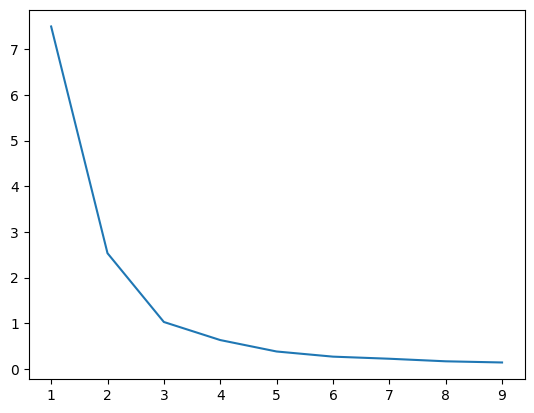

In [98]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[["Raised","Spent"]] = scaler.fit_transform(df[["Raised","Spent"]])

from sklearn.cluster import KMeans

inertia = []
for i in range(1,10):
    km = KMeans(n_clusters=i, n_init="auto")
    df[f"cluster_{i}"] = km.fit_predict(df[["Raised","Spent"]])
    inertia.append(km.inertia_)

plt.plot(range(1,10),inertia)


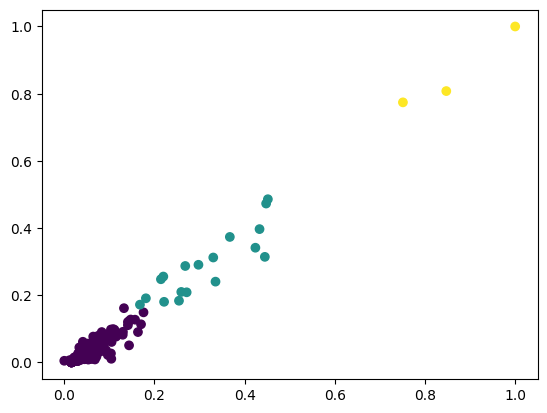

In [48]:
plt.scatter(df["Raised"],df["Spent"],c=df["cluster_3"])

In [99]:
df["cluster_3"].value_counts()

0    516
2     18
1      3
Name: cluster_3, dtype: int64

In [101]:
df[df["cluster_3"]==1].sort_values("Raised",ascending=False).head(10)

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
417,417,Raphael Warnock,Democratic,Georgia,Senate,1.000000,1.000000,1.000000,0.0,0,1,1,3,1,1,3,6,4
340,340,Mark Kelly,Democratic,Arizona,Senate,0.847210,0.807760,0.580473,0.0,0,1,1,3,1,1,3,1,6
523,523,Val Demings,Democratic,Florida,House,0.751061,0.774181,0.294046,0.0,0,1,1,3,1,1,3,1,6


In [92]:
indices = df[df["cluster_3"]==2].sort_values("Raised",ascending=False).head(10)["index"]
df_lookup.loc[indices]

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
442,442,Ron Johnson,Republican,Wisconsin,Senate,"$27,680,901","$23,731,653","$4,508,581","$11,759,857"
133,133,David Trone,Democratic,Maryland,House,"$12,990,741","$6,878,050","$6,206,371","$13,302,000"


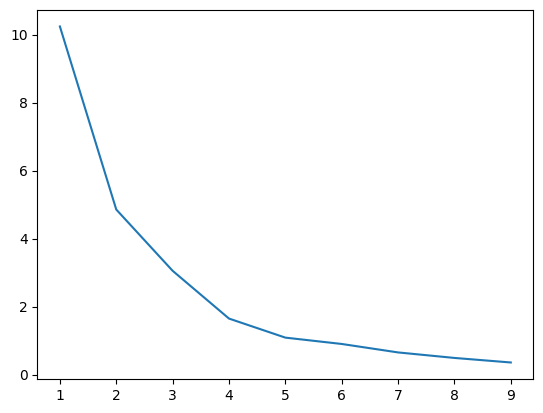

In [79]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[["Cash on Hand","Debts"]] = scaler.fit_transform(df[["Cash on Hand","Debts"]])

from sklearn.cluster import KMeans

inertia = []
for i in range(1,10):
    km = KMeans(n_clusters=i, n_init="auto")
    df[f"cluster_{i}"] = km.fit_predict(df[["Cash on Hand","Debts"]])
    inertia.append(km.inertia_)

plt.plot(range(1,10),inertia)


In [80]:
df["cluster_3"].value_counts()

0    511
1     24
2      2
Name: cluster_3, dtype: int64

In [88]:
indices = df[df["cluster_3"]==2].sort_values("Cash on Hand",ascending=False).head(10)["index"]
df_lookup.loc[indices]

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
133,133,David Trone,Democratic,Maryland,House,"$12,990,741","$6,878,050","$6,206,371","$13,302,000"
442,442,Ron Johnson,Republican,Wisconsin,Senate,"$27,680,901","$23,731,653","$4,508,581","$11,759,857"


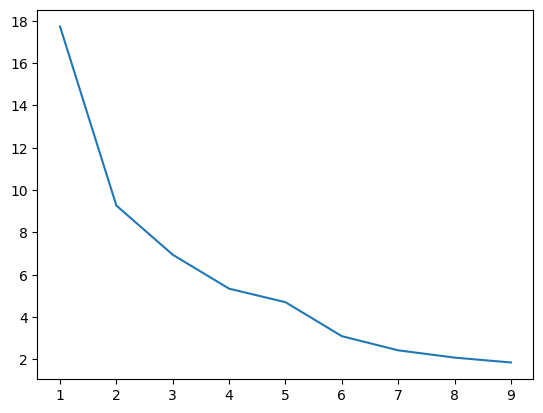

In [102]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[["Raised", "Spent", "Cash on Hand", "Debts"]] = scaler.fit_transform(df[["Raised", "Spent", "Cash on Hand", "Debts"]])

from sklearn.cluster import KMeans

inertia = []
for i in range(1,10):
    km = KMeans(n_clusters=i, n_init="auto")
    df[f"cluster_{i}"] = km.fit_predict(df[["Raised", "Spent", "Cash on Hand", "Debts"]])
    inertia.append(km.inertia_)

plt.plot(range(1,10),inertia)


In [107]:
df["cluster_6"].value_counts()

0    468
4     52
1      8
2      5
3      2
5      2
Name: cluster_6, dtype: int64

In [110]:
df[df["cluster_6"]==2].sort_values("Raised",ascending=False).head(10)

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
523,523,Val Demings,Democratic,Florida,House,0.751061,0.774181,0.294046,0.000000,0,1,1,3,2,2,5,5,7
499,499,Tim Ryan,Democratic,Ohio,House,0.451540,0.485913,0.065253,0.005118,0,1,2,3,2,2,5,2,4
87,87,Catherine Cortez Masto,Democratic,Nevada,Senate,0.447666,0.472999,0.225801,0.000000,0,1,2,3,2,2,5,2,4
328,328,Marco Rubio,Republican,Florida,Senate,0.433063,0.396961,0.424774,0.000000,0,1,2,1,2,2,5,2,4
326,326,Maggie Hassan,Democratic,New Hampshire,Senate,0.367193,0.373632,0.213700,0.000000,0,1,2,1,2,2,5,2,4


**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts? 
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the election?

**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q5.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?